<a href="https://colab.research.google.com/github/dyong00/2020-2-AI/blob/master/%ED%9A%A8%EC%84%B1_%EC%A3%BC%EA%B0%80_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
myfile = files.upload()

Saving 004800.KS.csv to 004800.KS (1).csv


In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [ ]:
data = pd.read_csv(io.BytesIO(myfile['004800.KS.csv']))
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-20,58637.89844,59423.19922,57852.60156,58376.10156,58376.10156,199374.0
1,2015-11-23,58899.69922,59685.00000,58376.10156,59423.19922,59423.19922,201677.0
2,2015-11-24,59685.00000,61779.19922,58899.69922,61517.50000,61517.50000,306708.0
3,2015-11-25,61255.69922,61517.50000,59685.00000,60732.10156,60732.10156,241578.0
4,2015-11-26,61517.50000,62826.30078,60470.30078,62826.30078,62826.30078,236146.0


In [ ]:
data = data.dropna()

In [ ]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [ ]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [ ]:

normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1053, 50, 1), (117, 50, 1))

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
106/106 [==============================] - 5s 47ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 2/20
106/106 [==============================] - 4s 42ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 3/20
106/106 [==============================] - 4s 40ms/step - loss: 9.8488e-04 - val_loss: 0.0014
Epoch 4/20
106/106 [==============================] - 4s 40ms/step - loss: 8.3160e-04 - val_loss: 8.6832e-04
Epoch 5/20
106/106 [==============================] - 4s 42ms/step - loss: 6.9534e-04 - val_loss: 0.0010
Epoch 6/20
106/106 [==============================] - 4s 42ms/step - loss: 5.6881e-04 - val_loss: 0.0014
Epoch 7/20
106/106 [==============================] - 4s 41ms/step - loss: 4.7420e-04 - val_loss: 0.0010
Epoch 8/20
106/106 [==============================] - 4s 41ms/step - loss: 4.5473e-04 - val_loss: 5.6612e-04
Epoch 9/20
106/106 [==============================] - 4s 40ms/step - loss: 4.3968e-04 - val_loss: 4.9010e-04
Epoch 10/20
106/106 [==============================

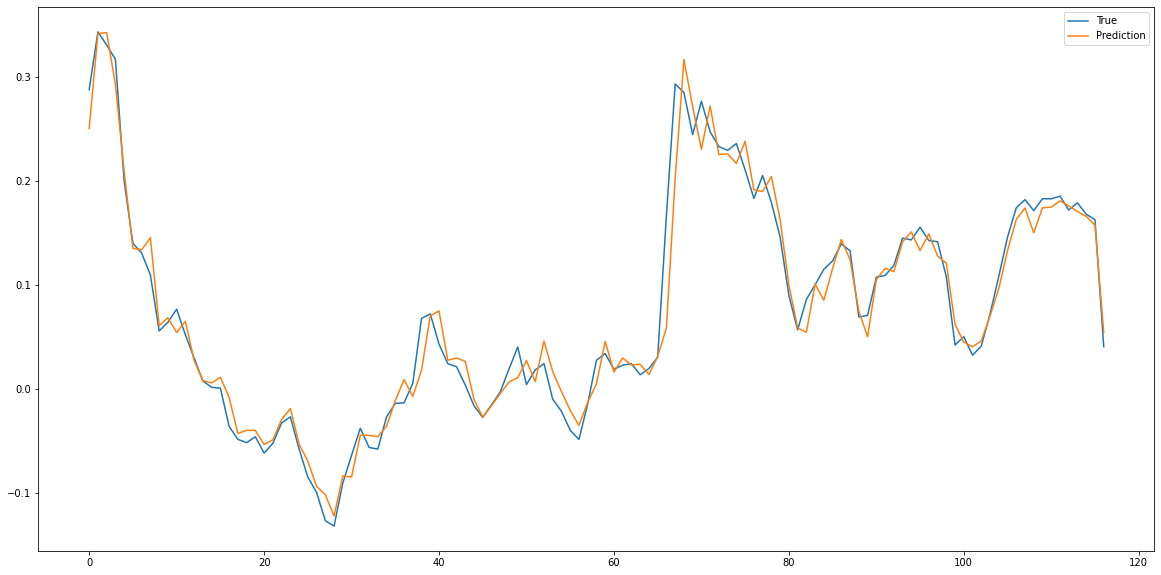

In [ ]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()